In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque

In [45]:
GRID_SIZE = 100
O_RATIO = 0.05

In [ ]:
class Grid:
    def __init__(self, size = GRID_SIZE, o_ratio = O_RATIO):
        self.size = size
        self.o_ratio = o_ratio
        self.grid = np.zeros((size, size))
        self.start = None
        self.end = None

    def generate_grid(self):
        for i in range(self.size):
            for j in range(self.size):
                if random.random() < self.o_ratio:
                    self.grid[i][j] = 1
    
    def set_start_goal(self):
        self.start = (random.randint(0, self.size-1), random.randint(0, self.size-1))
        self.end = (random.randint(0, self.size-1), random.randint(0, self.size-1))
        while self.grid[self.start[0]][self.start[1]] == 1 and self.start!= self.end:
            self.start = (random.randint(0, self.size-1), random.randint(0, self.size-1))
        while self.grid[self.end[0]][self.end[1]] == 1 and self.start != self.end:
            self.end = (random.randint(0, self.size-1), random.randint(0, self.size-1))
        # self.grid[self.start[0]][self.start[1]] = -1
        # self.grid[self.end[0]][self.end[1]] = -2

    def find_shortest_path(self):
        print(start, end)
        DIRS = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        dp = [[-1 for _ in range(self.size)] for _ in range(self.size)]
        queue = deque([self.start])
        dp[self.start[0]][self.start[1]] = 0
        while queue:
            x, y = queue.popleft()
            if (x, y) == self.end:
                path = []
                cx, cy = self.end
                while (cx, cy) != self.start:
                    path.append((cx, cy))
                    for dx, dy in DIRS:
                        nx, ny = cx + dx, cy + dy
                        if 0 <= nx < self.size and 0 <= ny < self.size and dp[nx][ny] == dp[cx][cy] - 1:
                            cx, cy = nx, ny
                            break
                path.append(self.start)
                path.reverse()
                return dp[self.end[0]][self.end[1]], path
            for dx, dy in DIRS:
                nx, ny = x + dx, y + dy
                if 0 <= nx < self.size and 0 <= ny < self.size and self.grid[nx][ny] == 0 and dp[nx][ny] == -1:
                    dp[nx][ny] = dp[x][y] + 1
                    queue.append((nx, ny))
        
        # If loop breaks, there's no path to the end
        return -1, []
    
    def plot_grid(self, path):
        plt.figure(figsize=(10, 10))
        grid_plot = self.grid.copy()
        for x, y in path:
            grid_plot[x][y] = 2
        plt.imshow(grid_plot, cmap='gray_r', interpolation='nearest')
        plt.scatter(self.start[1], self.start[0], color='green', label='Start', s=100)
        plt.scatter(self.end[1], self.end[0], color='red', label='Goal', s=100)
        plt.title("Grid World with Obstacles")
        plt.legend()
        plt.grid(True)
        plt.show()

In [123]:
grid = Grid()

In [124]:
grid.generate_grid()
grid.set_start_goal()

In [125]:
shortest_path, paths = grid.find_shortest_path()

(35, 93) (25, 92)


In [127]:
shortest_path

54

In [131]:
paths

[(54, 24),
 (55, 24),
 (56, 24),
 (57, 24),
 (58, 24),
 (59, 24),
 (60, 24),
 (61, 24),
 (62, 24),
 (63, 24),
 (64, 24),
 (65, 24),
 (66, 24),
 (67, 24),
 (68, 24),
 (69, 24),
 (70, 24),
 (71, 24),
 (72, 24),
 (73, 24),
 (74, 24),
 (75, 24),
 (75, 25),
 (76, 25),
 (77, 25),
 (78, 25),
 (79, 25),
 (80, 25),
 (81, 25),
 (82, 25),
 (83, 25),
 (84, 25),
 (85, 25),
 (86, 25),
 (87, 25),
 (88, 25),
 (89, 25),
 (90, 25),
 (91, 25),
 (92, 25),
 (93, 25),
 (94, 25),
 (95, 25),
 (96, 25),
 (96, 26),
 (96, 27),
 (96, 28),
 (96, 29),
 (96, 30),
 (96, 31),
 (96, 32),
 (96, 33),
 (96, 34),
 (96, 35),
 (97, 35)]

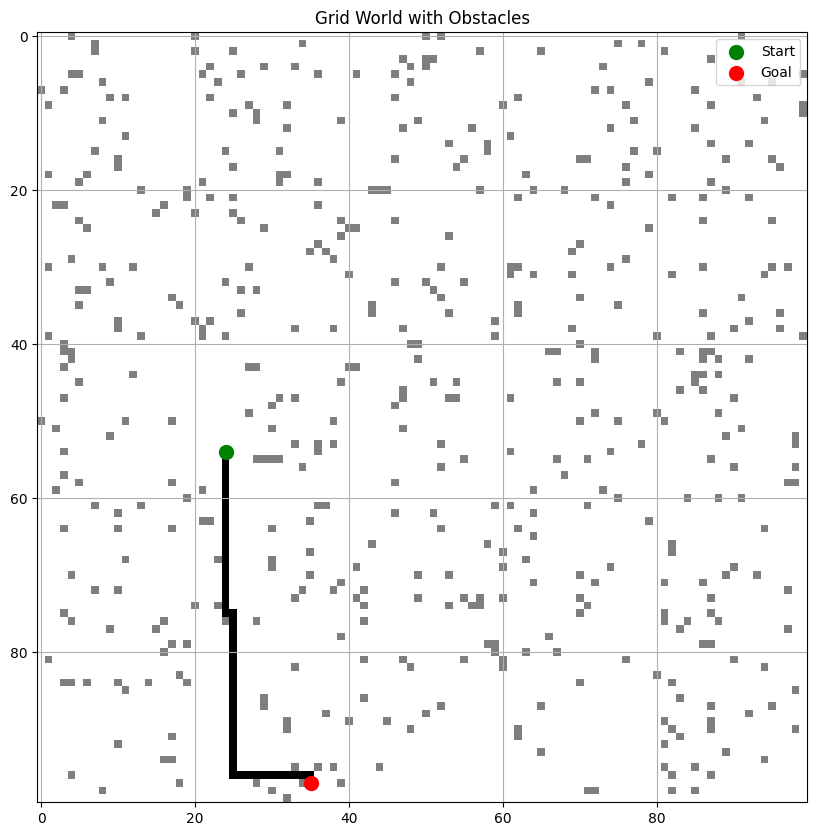

In [126]:
grid.plot_grid(paths)

In [132]:
array = grid.grid

In [134]:
array[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [138]:
grid.grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [203]:
class QAgent:
    def __init__(self, alpha, gamma, epsilon, n_episodes):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_episodes = n_episodes
        self.Q_table = np.zeros((ROWS, COLS, len(ACTIONS)))
        self.ACTIONS = ['up', 'down', 'left', 'right']
        self.action_map = {
            "up": 0,
            "down" : 1,
            "left" : 2,
            "right" : 3
        }
    
    def set_reward_grid(self, obstacles, start, end):
        self.reward = np.zeros((ROWS, COLS))
        self.reward[start[0]][start[1]] = 0
        self.reward[end[0]][end[1]] = 100
        for (x,y) in obstacles:
            self.reward[x][y] = -100
    
    def choose_next_action(self, state):
        if np.random.uniform(0, 1) < self.epsilon:
            action = np.random.choice(ACTIONS)
        else:
            action = ACTIONS[np.argmax(self.Q_table[state[0]][state[1]])]
        return action
    
    def get_next_state(self, state, action):
        x, y = state
        if action == 'up':
            x -= 1
        elif action == 'down':
            x += 1
        elif action == 'left':
            y -= 1
        elif action == 'right':
            y += 1
        if 0 <= x < ROWS and 0 <= y < COLS:
            return x, y
        return state
    def train_model(self):
        for episode in range(self.n_episodes):
            if episode % 10 == 0:
                    print(f"Episode {episode}")
            state = grid.start
            action = self.choose_next_action(state)
            next_state = self.get_next_state(state, action)
            reward = self.reward[next_state]
            next_action = self.choose_next_action(next_state)
            self.Q_table[state[0]][state[1]][self.action_map[action]] = self.Q_table[state[0]][state[1]][self.action_map[action]] + self.alpha * (reward + self.gamma * self.Q_table[next_state[0]][next_state[1]][self.action_map[next_action]] - self.Q_table[state[0]][state[1]][self.action_map[action]])
            if next_state == grid.end:
                print(f"Episode {episode} finished")
                break
            state = next_state
        print(state)
        return self.Q_table, self.reward

In [210]:
alpha = 0.1
gamma = 0.6
epsilon = 0.1
n_episodes = 100000
qagent = QAgent(alpha, gamma, epsilon, n_episodes)

In [211]:
qagent.Q_table.shape

(100, 100, 4)

In [212]:
BLOCKED_STATES = [] # inaccessible
for i in range(100):
        for j in range(100):
            if array[i][j] == 1:
                BLOCKED_STATES.append((i, j))
# qagent.set_reward_grid(BLOCKED_STATES, grid.start, grid.end)
BLOCKED_STATES[:5]

[(0, 4), (0, 20), (0, 50), (0, 52), (0, 91)]

In [213]:
qagent.set_reward_grid(BLOCKED_STATES, grid.start, grid.end)

In [214]:
qtable, rewards = qagent.train_model()

Episode 0
Episode 10
Episode 20
Episode 30
Episode 40
Episode 50
Episode 60
Episode 70
Episode 80
Episode 90
Episode 100
Episode 110
Episode 120
Episode 130
Episode 140
Episode 150
Episode 160
Episode 170
Episode 180
Episode 190
Episode 200
Episode 210
Episode 220
Episode 230
Episode 240
Episode 250
Episode 260
Episode 270
Episode 280
Episode 290
Episode 300
Episode 310
Episode 320
Episode 330
Episode 340
Episode 350
Episode 360
Episode 370
Episode 380
Episode 390
Episode 400
Episode 410
Episode 420
Episode 430
Episode 440
Episode 450
Episode 460
Episode 470
Episode 480
Episode 490
Episode 500
Episode 510
Episode 520
Episode 530
Episode 540
Episode 550
Episode 560
Episode 570
Episode 580
Episode 590
Episode 600
Episode 610
Episode 620
Episode 630
Episode 640
Episode 650
Episode 660
Episode 670
Episode 680
Episode 690
Episode 700
Episode 710
Episode 720
Episode 730
Episode 740
Episode 750
Episode 760
Episode 770
Episode 780
Episode 790
Episode 800
Episode 810
Episode 820
Episode 830
Epi

## Values is not converging

In [209]:
grid.end

(97, 35)